# COMP 755

Today:

Fitting neural network's parameters using back-propagation


$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\ff}{\mathbf{f}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\ddelta}{\boldsymbol{\mathbf{\delta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\bg}{\mathbf{g}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\hh}{\mathbf{h}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\rr}{\mathbf{r}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}{\textrm{sign}}
\renewcommand{\minimize}{\mathop{\textrm{minimize}}}
\renewcommand{\subjectto}{\mathop{\textrm{subject to}}}
\renewcommand{\evalat}[1]{\Big|_{#1}} 
$$



# (Deep) Neural networks compute through forward propagation
Deep networks are built up out of layers.

![](net.png)



# (Deep) Neural networks compute through forward propagation

Let $f$ be an activation function and 
$$
\ff(\zz)_i = f(z_i).
$$

We will denote number of variables in layer $l$ as $n_l$.

Size of the zeroth layer, $n_0$, is number of features in a sample.


With each layer, $l>0$, we assoiate a matrix of size $\WW^l: n_l \times n_{l-1}$ and a bias vector $\bb^l : n_l$

Recursive specification for forward propagation is given by
$$
\hh^l = \ff(\WW^1\hh^{l-1} + \bb^l).
$$



# Forward propagation restated




We restate forward propagation to make it easier to compute derivatives

\begin{align}
\hh^0 &= \xx \\
\zz^l &= \WW^l\hh^{l-1} + \bb^l \\
\hh^l &= \ff(\zz^l).
\end{align}
![](forward-prop-detailed.png)


# Common loss functions for Deep neural nets

Output of the network is $\hat{y}(\xx) = \hh^L$, where $L$ is the depth of the network.

In order to asses how the network is performing we need an objective.
$$
E = \sum_t \textrm{loss}(\hat{y}(\xx^t),y^t)
$$

Loss for continuous $y$: 
$$
\textrm{loss}(\hat{y},y) = \frac{1}{2}(y-\hat{y})^2
$$

Loss for a binary $y$: 
$$
\textrm{loss}(\hat{y},y) = -y\log(\hat{y}) - (1 - y)\log(1 - \hat{y})
$$

**Q: We can work through a sanity check here. Is the loss larger when $y \neq \hat{y}$ than when $y = \hat{y}$?** 

[Hint: You can assume that $0\log0 = 0$]

# Looking at the objective and forward propagation

We have 

\begin{align}
\hh^0 &= \xx \\
\zz^l &= \WW^l\hh^{l-1} + \bb^l && \textrm{input into the $l$th layer activation } \\
\hh^l &= \ff(\zz^l) && \textrm{output of the $l$th layer activation} \\
\hat{y}(\xx) &= h^L && \textrm{output is the last layer's state} \\
\end{align}

The objective is given by
$$
E = \sum_t \textrm{loss}(\hat{y}(\xx),y^t).
$$

We are interested in minimizing the loss, so we need partial derviatives $$\frac{\partial E}{\partial w^l_{ij}} \textrm{ and } \frac{\partial E}{\partial b^l_{i}}$$ for all layers $l=1,...L$.


# Frame of mind for back-prop(agation)

Forward prop is a recursive procedure which propagates information upward to make a prediction.

That error of that prediction $E$ can be reduced if we change parameter $w^l_{ij}$ according to the gradient 
$$
\frac{\partial E}{\partial w^{l}_{ij}}
$$
Chain rule tels us that
$$
\frac{\partial E}{\partial w^{l}_{ij}} = \frac{\partial E}{\partial h^l_i}\frac{\partial h^l_i}{\partial w^{l}_{ij}} 
$$

![](dependencies.png)



# Frame of mind for back-prop


We compute how much of the error in the prediction is attributable to each parameter.

To do this we will break down computation into two parts:
1. computing how a hidden variable affects the objective -- across all orange paths
$$
\frac{\partial E}{\partial h^l_i}
$$
2. computing how parameter associated with the hidden variable affects the variable -- blue edge
$$
\frac{\partial h^l_i}{\partial w^{l}_{ij}}
$$

![](dependencies.png)


# Total derivative reminder 


Total derivative
$$
\frac{\partial
f(\zz(t)) }{\partial t}= \sum_i \frac{\partial f}{\partial z_i}\frac{\partial z_i}{\partial t} 
$$


Let's say 
$$
f(x,y,z) = x^2 + y^3 + z^4
$$
and let's say
$$
g(t) = f(t,t,1)
$$
then 
$$
\frac{\partial g(t)}{\partial t} = 2t + 3t^2
$$

# Evaluate-at notation
Also, to be very explicit
$$
\frac{\partial f(\zz)}{\partial z_i}\evalat{\zz = \zz_0}
$$
this is a partial derivative with respect to $z_i$ evaluated at $\zz_0$.


For example,
$$
\frac{\partial z_1^2 + z_2}{\partial z_1}\evalat{\zz = [1.0,-1.0]} = 2z_1\evalat{\zz = [1.0,-1.0]} = 2
$$

Once we get used to this, I will drop the "evaluate-at" notation.

As a rule of thumb, everything on the left of the vertical bar are variables and functions, **not** values.

Values occur only on the right side of the bar.

# Using chain rule to compute derivatives -- back propagation

For completness, we are briefly going to be very explicit about the states of the neural network for different samples.

Forward propagation on each of the samples gives us 

\begin{align}
\hh^{0,t} &= \xx^t  && \textrm{sample t, feature vector}\\
\zz^{l,t} &= \WW^l\hh^{l-1,t} + \bb^{l} && \textrm{sample t, input $l$th layer activation}\\
\hh^{l,t} &= \ff(\zz^{l,t}) && \textrm{sample t, output $l$th layer activation}\\
\hat{y}(\xx^t) &= h^{L,t} && \textrm{sample t, network prediction} \\
\end{align}

# Using chain rule to compute derivatives -- back propagation

The objective is given by
$$
E = \sum_t \textrm{loss}(\hat{y}(\xx^t),y^t).
$$

Partial derivative

\begin{align}
\frac{\partial E}{\partial w^l_{ij} } &= 
 \sum_t\frac{\partial  \textrm{loss}(\hat{y},y^t)}{\partial \hat{y}}\evalat{\hat{y} = \hat{y}(\xx^t)}\frac{ \hat{y}}{\partial h^L }\evalat{h^L = h^{L,t}}\frac{ \partial h^L }{\partial w^l_{ij}}
 \end{align}

Pausing here for a moment: $h^L$ is a variable, $h^{L,t}$ is a value computed through forward propagation starting with input $\xx^t$.

# Simplifying math

Carrying the sample index, $t$, and stating where the partial derivatives are evaluated is cumbersome.

From this point on, we will compute partial derivative for a single sample and some parameter $\theta$.

Further, all derivatives will be evaluated at values obtained through forward propagation ($\hh^l,\zz^l$).

Hence, this term
\begin{align}
\frac{\partial \textrm{loss}(\hat{y}(\xx^t),y^t)}{\partial \theta} &= \frac{\partial  \textrm{loss}(\hat{y},y^t)}{\partial \hat{y}}\evalat{\hat{y} = \hat{y}(\xx^t)}\frac{ \hat{y}}{\partial h^L }\evalat{h^L = h^{L,t}}\frac{ \partial h^L }{\partial \theta}\end{align}
after dropping sample index and removing evalate-at notation, simplifies to
\begin{align}
\frac{\partial \textrm{loss}(\hat{y},y)}{\partial \theta} &= 
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\frac{ \hat{y}}{\partial h^L }\frac{ \partial h^L }{\partial \theta}\end{align}




# Using chain rule to compute derivatives -- back propagation



We are going to use the facts that $\hh^m$ depends on $\zz^{m}$ and $\zz^m$ depends on $\hh^{m-1}$ to keep expanding the derivative to highlight a pattern


\begin{align}
\frac{\partial  \textrm{loss}(\hat{y},y)}{ \partial \theta} &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\sum_{i=1}^{n_L}\frac{ \hat{y}}{\partial h_i^L } \frac{ \partial h_i^L}{\partial z_i^L}\frac{ \partial z_i^L}{\partial \theta}\\
&= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\sum_{i=1}^{n_L}\frac{ \hat{y}}{\partial h_i^L } \frac{ \partial h^L}{\partial z_i^L}\sum_{j=1}^{n_{L-1}} \frac{ \partial z_i^L}{\partial h_j^{L-1}}\frac{ \partial h_j^{L-1}}{\partial \theta}\\
&=\sum_{j=1}^{n_{L-1}}\underbrace{\sum_{i=1}^{n_L} \overbrace{\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\frac{ \hat{y}}{\partial h_i^L }}^{\partial  \textrm{loss}(\hat{y},y)/\partial h_i^{L}} \frac{ \partial h_i^L}{\partial z_i^L} \frac{ \partial z_i^L}{\partial h_j^{L-1}}}_{\partial  \textrm{loss}(\hat{y},y)/\partial h_j^{L-1}} \frac{ \partial h_j^{L-1}}{\partial  \theta}\\
\end{align}

Hence, we can see a recursion needed to compute $\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_j^{L-1}}$ using $\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{L}}$


# Using chain rule to compute derivatives -- back propagation


Start of recursion at $L$:

\begin{align}
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{L}} &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\frac{ \hat{y}}{\partial h_i^L }
\end{align}

Recursive rule, going **back** from layer $l$ to $l-1$:

\begin{align}
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_j^{l-1}} &= \sum_{i=1}^{n_{l}}\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} \frac{\partial h^l_i}{\partial z^l_i}\frac{\partial z^l_i}{\partial h_j^{l-1}}\\
&= \sum_{i=1}^{n_{l}}\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)w^l_{ij}
\end{align}


# Recap

Given a neural network we know how to use **forward propagation** to obtain $\hh$ and $\zz$.


Using these $\hh$ and $\zz$ we can use a **back propagation** to compute $\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}}$

We can plug-in computed $\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}}$ to obtain derivatives of the loss with respect to parameters 

\begin{align}
\frac{\partial E}{\theta } &= 
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}}\frac{ \partial h_i^L }{\partial \theta}
\end{align}

where $\theta$ is either $w^l_{ij}$ or $b^l_i$

# Computing derivatives within a layer
<br>

\begin{align}
\frac{\partial E}{\theta } &= 
\underbrace{\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}}}_{\textrm{know how to compute}}\underbrace{\frac{ \partial h_i^L }{\partial \theta}}_{\textrm{need to figure out}}
\end{align}


Hence
$$
\frac{ \partial h_i^L }{\partial \theta}  = \frac{ \partial h_i^L }{\partial z_i^l}\frac{ \partial z_i^L }{\partial \theta}
$$


$$
\frac{ \partial h_i^L }{\partial \theta}  = \frac{ \partial h_i^L }{\partial z_i^l}\frac{ \partial z_i^L }{\partial \theta}
$$
Gives us

\begin{align}
\frac{\partial h_i^l}{\partial w^l_{ij}} &=   f'(z^l_i)h^{l-1}_j \\ 
\frac{\partial h_i^l}{\partial b^l_{i}} &=  f'(z^l_i)
\end{align}

# Back-propagation: putting it together
1. Run forward prop
\begin{align}
\hh^0 &= \xx \\
\zz^l &= \WW^l\hh^{l-1} + \bb^l && \textrm{input into the $l$th layer activation } \\
\hh^l &= \ff(\zz^l) && \textrm{output of the $l$th layer activation} \\
\hat{y}(\xx) &= h^L && \textrm{output is the last layer's state} \\
\end{align}
2. Run backward prop
\begin{align}
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{L}} &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\frac{ \hat{y}}{\partial h_i^L }\\
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_j^{l-1}} &= \sum_{i=1}^{n_{l}}\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)w^l_{ij}
\end{align}
3. Compute gradients

\begin{align}
\frac{\partial E}{w^l_{ij} } &= 
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)h^{l-1}_j\\
\frac{\partial E}{b^l_{i} } &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)\\
\end{align}

In [293]:
import numpy as np

def loss(yhat,y):
    # loss(yhat,y)
    l = 0.5*(yhat - y)**2.0
    # d loss(yhat,y) / d yhat
    g = (yhat - y)
    return l,g

def sigmoid(z):    
    # if z is a vector
    # h is a vector of outputs
    # g is derivative of f at each z
    h = 1.0/(1.0 + np.exp(-z))
    g = h*(1.0 - h)  
    return h,g

def compute_loss(loss,predict,x,y):
    yhat = predict(x)
    val,_ = loss(yhat,y)
    return val.squeeze()



![](xor.png)

1. Run forward prop
\begin{align}
\hh^0 &= \xx \\
\zz^l &= \WW^l\hh^{l-1} + \bb^l && \textrm{input into the $l$th layer activation } \\
\hh^l &= \ff(\zz^l) && \textrm{output of the $l$th layer activation} \\
\hat{y}(\xx) &= h^L && \textrm{output is the last layer's state} \\
\end{align}

In [206]:
def forward_prop(x,f,Ws,bs):
    # simple implementation of forward prop    
    hs = [x]               # store h^0
    zs = [np.zeros(len(x))] # store z^0
    h = x                  # current layer is 0 
    L = len(Ws)            
    for l in range(L):     
        Wl = Ws[l]            # get layer weights
        bl = bs[l]            # get layer biases
        nl = Wl.shape[0]      # number of variables in 
                              # layer l        
        z = np.dot(Wl,h) + bl # input into layer l
        h,_ = f(z)            # activation for each z
        zs.append(z)        
        hs.append(h)
    return hs,zs

# XOR net 
Ws = []
bs = []
F = 5.0
# first layer 
Ws.append(F*np.asarray([[1.0,-1.0],
                        [-1.0,1.0]]))
bs.append(F*np.asarray([[-0.5],
                      [-0.5]]))
# second layer weights
Ws.append(F*np.asarray([[1.0,1.0]]))
bs.append(F*np.asarray([[-0.5]]))

for x1 in [0.0,1.0]:
    for x2 in [0.0,1.0]:
        x = np.asarray([[x1],[x2]])
        hs,zs = forward_prop(x,sigmoid,Ws,bs)
        print "Input: ",x.T,"Output: ",hs[-1].squeeze()

Input:  [[ 0.  0.]] Output:  0.149132886381
Input:  [[ 0.  1.]] Output:  0.893163783089
Input:  [[ 1.  0.]] Output:  0.893163783089
Input:  [[ 1.  1.]] Output:  0.149132886381


2. Run backward prop
\begin{align}
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{L}} &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial \hat{y}}\frac{ \hat{y}}{\partial h_i^L }\\
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_j^{l-1}} &= \sum_{i=1}^{n_{l}}\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)w^l_{ij}
\end{align}

In [208]:
def backward_prop(loss,f,Ws,bs,zs,y):
    _,dldh = loss(hs[-1],y)
    L = len(Ws)
    dldhs = [[]]*(L+1) # one per layer    
    dldhs[L] = dldh  # derivative of loss with respect to
                     # prediction (yhat)
    for l in reversed(range(L)):
        Wl = Ws[l]
        bl = bs[l]
        nl = Wl.shape[0]
        n = Wl.shape[1]
        dldhs[l] = np.zeros((n,1))
        for i in range(nl):
            _,df = f(zs[l+1][i]) 
            m = dldhs[l+1][i]*df
            for j in range(n):                            
                dldhs[l][j] = m*Wl[i,j]
    return dldhs


3. Compute gradients

\begin{align}
\frac{\partial E}{w^l_{ij} } &= 
\frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)h^{l-1}_j\\
\frac{\partial E}{b^l_{i} } &= \frac{\partial  \textrm{loss}(\hat{y},y)}{\partial h_i^{l}} f'(z^l_i)\\
\end{align}

In [ ]:
def compute_gradients(dldhs,f,zs,hs):
    L = len(dldhs)-1
    dWs = [[]]*L
    dbs = [[]]*L
    for l in range(L):
        nl = len(hs[l+1])
        n = len(hs[l])
        dWs[l] = np.zeros((nl,n))
        for i in range(nl):             
            _,g = f(zs[l+1][i])
            hl = hs[l].squeeze()
            dWs[l][i,:] = dldhs[l+1][i]*g*hl
            dbs[l] = dldhs[l+1][i]*g
            
            
    return dWs,dbs

In [329]:
#
# Gradient Checking code using finite diffrences
# 
x = np.asarray([[1.0],[1.0]])
y = np.asarray([[0.0]])
Ws[0] = 0.1*np.random.randn(2,2)
Ws[1] = 0.1*np.random.randn(1,2)
bs[0] = 0.1*np.random.randn(2,1)
bs[1] = 0.1*np.random.randn(1,1)
hs,zs = forward_prop(x,sigmoid,Ws,bs)
dldhs = backward_prop(loss,sigmoid,Ws,bs,zs,y)  
dWs,dbs = compute_gradients(dldhs,sigmoid,zs,hs)

L = len(dWs)
eps = 1e-7
fddWs = [[]]*L


for l in range(L):
    fddWs[l] = np.zeros(Ws[l].shape)
    for i in range(Ws[l].shape[0]):
        for j in range(Ws[l].shape[1]):
            Wc = Ws[l].copy()
            Ws[l][i,j] = Wc[i,j] + 0.5*eps            
            predict = lambda x: forward_prop(x,sigmoid,Ws,bs)[0][-1].squeeze()
            v1 = compute_loss(loss,predict,x,y)
            Ws[l][i,j] = Wc[i,j] - 0.5*eps            
            predict = lambda x: forward_prop(x,sigmoid,Ws,bs)[0][-1].squeeze()
            v2 = compute_loss(loss,predict,x,y)
            Ws[l] = Wc
            fddWs[l][i,j] = (v1 - v2)/eps
            print(fddWs[l][i,j],dWs[l][i,j])
    

(0.0031136092315531272, 0.0031136087408337918)
(0.0031136092315531272, 0.0031136087408337918)
(-0.0047451058360348242, -0.0047451063432885328)
(-0.0047451058360348242, -0.0047451063432885328)
(0.05932591112811636, 0.059325910360931711)
(0.053831228363776518, 0.053831228615190692)


In [327]:

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
Ws[0] = 0.5*np.random.randn(2,2)
Ws[1] = 0.5*np.random.randn(1,2)
bs[0] = 0.5*np.random.randn(2,1)
bs[1] = 0.5*np.random.randn(1,1)


N = 1000
x = (np.random.rand(2,N)>0.5).astype('float')
x = x + 0.1*np.random.randn(2,N)

y = np.logical_xor(x[0,:]>0.5,x[1,:]>0.5).astype('float')

L = 2
eta = 3e-2
Es = []
for it in range(200):
    E = 0    
    for l in range(L):
        dWs[l] = np.zeros(Ws[l].shape)
        dbs[l] = np.zeros(bs[l].shape)
        
    for t in range(N):
        xt = x[:,[t]]
        yt = y[t]
        hs,zs = forward_prop(xt,sigmoid,Ws,bs)
        dldhs = backward_prop(loss,sigmoid,Ws,bs,zs,yt)  
        dtWs,dtbs = compute_gradients(dldhs,sigmoid,zs,hs)
        for l in range(L):
            dWs[l] = dWs[l] + dtWs[l]
            dbs[l] = dbs[l] + dtbs[l]            
        Et = loss(hs[-1][0][0],yt)[0]
        E = E + Et    
    for l in range(L):
        Ws[l] = Ws[l] - eta*dWs[l]
        bs[l] = bs[l] - eta*dbs[l]        
    Es.append(E)     
    



First layer weights:
[[-3.2933533  -3.3736506 ]
 [-6.57363912 -6.7182171 ]]
First layer biases:
[[ 4.72145779]
 [ 3.46844846]]
Second layer weights:
[[ 9.89952122 -9.51866265]]
Second layer biases:
[[-4.20933528]]
Input:  [[ 0.  0.]] Output:  0.0258780857113
Input:  [[ 0.  1.]] Output:  0.96419601442
Input:  [[ 1.  0.]] Output:  0.966669564212
Input:  [[ 1.  1.]] Output:  0.0487062060114


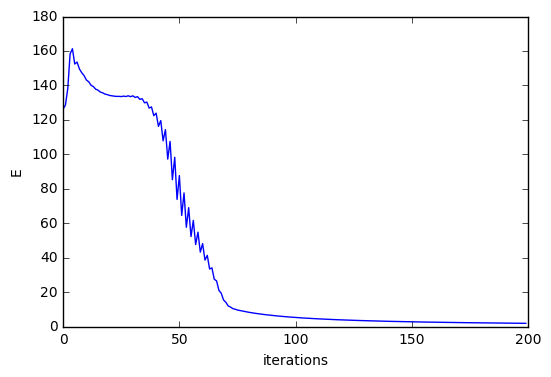

In [328]:
plt.plot(Es)
plt.xlabel('iterations')
plt.ylabel('E')
print "First layer weights:\n",Ws[0]
print "First layer biases:\n",bs[0]
print "Second layer weights:\n",Ws[1]
print "Second layer biases:\n",bs[1]

for x1 in [0.0,1.0]:
    for x2 in [0.0,1.0]:
        x = np.asarray([[x1],[x2]])
        hs,zs = forward_prop(x,sigmoid,Ws,bs)
        print "Input: ",x.T,"Output: ",hs[-1].squeeze()

# Recap

We introduced back-propagation.

It decomposed computation of partial derivatives of the loss wrt parameters into two tasks
1. derivative of loss with respect to hidden variables
2. derivative of the hidden variable with respect to parameter

First task was accomplished using chain rule to yield a recursive formula which works backwards from the loss -- back-propagation.

Second task was accomplished by taking derivatives within a layer.

